In [230]:
import pandas as pd
import numpy as np
import json
import geopandas
from shapely.geometry import Point
import urllib.request
import matplotlib
import matplotlib.pyplot as plt


In [154]:
complaint = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

In [155]:
complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983207 entries, 0 to 6983206
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [156]:
complaint.tail()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
6983202,202934942,09/12/2014,17:50:00,09/12/2014,17:55:00,28.0,09/12/2014,341,PETIT LARCENY,333.0,...,NaN,NaN,40.808374,-73.946886,"(40.808374136, -73.946885823)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D
6983203,327134526,12/20/2012,13:30:00,12/20/2012,13:35:00,70.0,12/20/2012,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.648648,-73.967731,"(40.648648047, -73.967730515)",PATROL BORO BKLYN SOUTH,NaN,25-44,BLACK,F
6983204,671421638,04/04/2013,13:00:00,04/04/2013,15:30:00,90.0,04/04/2013,341,PETIT LARCENY,321.0,...,NaN,NaN,40.716045,-73.964163,"(40.716044892, -73.964162712)",PATROL BORO BKLYN NORTH,NaN,45-64,WHITE,M
6983205,980011525,09/09/2015,13:00:00,09/09/2015,13:50:00,13.0,09/09/2015,360,NaN,649.0,...,NaN,4.0,40.735211,-73.991691,"(40.735211323, -73.991691398)",PATROL BORO MAN SOUTH,DISTRICT 4 OFFICE,NaN,UNKNOWN,E
6983206,719347170,08/19/2012,01:00:00,08/19/2012,01:30:00,73.0,08/19/2012,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.667573,-73.907296,"(40.667573424, -73.907295766)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F


When a complaint contains only a From Datetime, this represents the exact datetime when the crime incident was reported to occur. In the event a complaint has both a From Datetime and a To Datetime, a time range (rather than an exact time) was specified for the occurrence of the crime. In rare cases, records containing only a To Datetime indicate only a known endpoint to the crime. Thus, we use "from date" as the date to analysis.

In [157]:
complaint["date"] = pd.to_datetime(complaint["CMPLNT_FR_DT"], format='%m/%d/%Y', errors='coerce')

In [158]:
complaint["date"].max()

Timestamp('2019-12-31 00:00:00')

In [159]:
complaint2019 = complaint[(complaint["date"]>pd.to_datetime('02/28/2019', format='%m/%d/%Y')) & (complaint["date"]<pd.to_datetime('07/01/2019', format='%m/%d/%Y'))]

In [160]:
complaint2018 = complaint[(complaint["date"]>pd.to_datetime('02/28/2018', format='%m/%d/%Y')) & (complaint["date"]<pd.to_datetime('07/01/2018', format='%m/%d/%Y'))]
complaint2017 = complaint[(complaint["date"]>pd.to_datetime('02/28/2017', format='%m/%d/%Y')) & (complaint["date"]<pd.to_datetime('07/01/2017', format='%m/%d/%Y'))]

In [161]:
complaintCurrent = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')

In [162]:
complaintCurrent["date"] = pd.to_datetime(complaintCurrent["CMPLNT_FR_DT"], format='%m/%d/%Y', errors='coerce')

In [163]:
complaint2020 = complaintCurrent[(complaintCurrent["date"]>pd.to_datetime('02/29/2020', format='%m/%d/%Y')) & (complaintCurrent["date"]<pd.to_datetime('07/01/2020', format='%m/%d/%Y'))]

In [164]:
complaint2020 = complaint2020.drop_duplicates(subset="CMPLNT_NUM", keep='last')
complaint2019 = complaint2019.drop_duplicates(subset="CMPLNT_NUM", keep='last')
complaint2018 = complaint2018.drop_duplicates(subset="CMPLNT_NUM", keep='last')
complaint2017 = complaint2017.drop_duplicates(subset="CMPLNT_NUM", keep='last')

In [165]:
complaint["OFNS_DESC"].unique()

array(['ASSAULT 3 & RELATED OFFENSES', 'GRAND LARCENY', 'PETIT LARCENY',
       'HARRASSMENT 2', 'MURDER & NON-NEGL. MANSLAUGHTER', 'SEX CRIMES',
       'DANGEROUS WEAPONS', 'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY',
       'INTOXICATED & IMPAIRED DRIVING', 'DANGEROUS DRUGS',
       'CRIMINAL TRESPASS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'FELONY ASSAULT', 'FRAUDS', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST PUBLIC ADMINI', 'VEHICLE AND TRAFFIC LAWS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
       'THEFT-FRAUD', 'ROBBERY', 'UNAUTHORIZED USE OF A VEHICLE',
       'FORGERY', 'ARSON', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY', 'RAPE',
       'OFFENSES INVOLVING FRAUD', nan, 'ADMINISTRATIVE CODE',
       'KIDNAPPING & RELATED OFFENSES', 'FRAUDULENT ACCOSTING',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA',
       'THEFT OF SERVICES', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'PROSTITUTIO

In [166]:
# Crime reclassification, https://www.justia.com/criminal/offenses/
CRIME_TYPES = {
    "property crimes": [
        'GRAND LARCENY',
        'PETIT LARCENY',
        'CRIMINAL MISCHIEF & RELATED OF',
        'BURGLARY',
        'ARSON',
        'OFFENSES AGAINST THE PERSON',
        'POSSESSION OF STOLEN PROPERTY',
        'GRAND LARCENY OF MOTOR VEHICLE',
        'OTHER OFFENSES RELATED TO THEF',
        'THEFT-FRAUD',
        'ROBBERY',
        'THEFT OF SERVICES',
        "BURGLAR'S TOOLS",
        'PETIT LARCENY OF MOTOR VEHICLE',
        'JOSTLING'
    ],
    "personal crimes": [
        'ASSAULT 3 & RELATED OFFENSES',
        'HARRASSMENT 2',
        'MURDER & NON-NEGL. MANSLAUGHTER',
        'SEX CRIMES',
        'FELONY ASSAULT',
        'RAPE',
        'KIDNAPPING & RELATED OFFENSES',
        'NYS LAWS-UNCLASSIFIED FELONY',
        'OFFENSES RELATED TO CHILDREN',
        'CHILD ABANDONMENT/NON SUPPORT',
        'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
        'HOMICIDE-NEGLIGENT-VEHICLE',
        'KIDNAPPING',
        'KIDNAPPING AND RELATED OFFENSES',
        'FELONY SEX CRIMES'
    ],
    "statutory crimes": [
        'DANGEROUS DRUGS',
        'OFF. AGNST PUB ORD SENSBLTY &',
        'ALCOHOLIC BEVERAGE CONTROL LAW',
        'LOITERING FOR DRUG PURPOSES',
        'UNDER THE INFLUENCE OF DRUGS'
    ],
    "traffic crimes": [
        'INTOXICATED & IMPAIRED DRIVING',
        'UNAUTHORIZED USE OF A VEHICLE',
        'UNAUTHORIZED USE OF A VEHICLE',
        'HOMICIDE-NEGLIGENT-VEHICLE',
        'INTOXICATED/IMPAIRED DRIVING',
        'OTHER TRAFFIC INFRACTION'
    ],
    "other crimes": [
        'DANGEROUS WEAPONS',
        'CRIMINAL TRESPASS',
        'FRAUDS',
        'MISCELLANEOUS PENAL LAW',
        'OFFENSES AGAINST PUBLIC ADMINI',
        'FORGERY',
        'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING',
        'OTHER STATE LAWS (NON PENAL LA',
        'PROSTITUTION & RELATED OFFENSES',
        'GAMBLING',
        'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
        'OFFENSES AGAINST PUBLIC SAFETY',
        'LOITERING',
        'ESCAPE 3',
        'ENDAN WELFARE INCOMP',
        'DISORDERLY CONDUCT',
        'NYS LAWS-UNCLASSIFIED VIOLATION',
        'OTHER STATE LAWS',
        'LOITERING/GAMBLING (CARDS, DIC',
        'UNLAWFUL POSS. WEAP. ON SCHOOL',
        'DISRUPTION OF A RELIGIOUS SERV',
        'ANTICIPATORY OFFENSES',
        'OTHER STATE LAWS (NON PENAL LAW)',
        'LOITERING/DEVIATE SEX',
        'FORTUNE TELLING',
        'ABORTION',
        'OFFENSES AGAINST MARRIAGE UNCL',
        'ADMINISTRATIVE CODE',
        'NEW YORK CITY HEALTH CODE',
        'ADMINISTRATIVE CODES'
    ]
}

In [167]:
def reclassify(crime_desc):
    arr = []
    classified = "N/A"
    for crime_code in crime_desc:
        for key in CRIME_TYPES:
            if crime_code in CRIME_TYPES[key]:
                classified = key
        arr.append(classified)
    
    return arr

In [168]:
complaint2020 = complaint2020.reset_index().assign(reclassification=pd.Series(np.array(reclassify(complaint2020["OFNS_DESC"]))))
complaint2019 = complaint2019.reset_index().assign(reclassification=pd.Series(np.array(reclassify(complaint2019["OFNS_DESC"]))))
complaint2018 = complaint2018.reset_index().assign(reclassification=pd.Series(np.array(reclassify(complaint2018["OFNS_DESC"]))))
complaint2017 = complaint2017.reset_index().assign(reclassification=pd.Series(np.array(reclassify(complaint2017["OFNS_DESC"]))))

In [169]:
complaint2020 = geopandas.GeoDataFrame(complaint2020, geometry=geopandas.points_from_xy(x=complaint2020.Longitude, y=complaint2020.Latitude))
complaint2019 = geopandas.GeoDataFrame(complaint2019, geometry=geopandas.points_from_xy(x=complaint2019.Longitude, y=complaint2019.Latitude))
complaint2018 = geopandas.GeoDataFrame(complaint2018, geometry=geopandas.points_from_xy(x=complaint2018.Longitude, y=complaint2018.Latitude))
complaint2017 = geopandas.GeoDataFrame(complaint2017, geometry=geopandas.points_from_xy(x=complaint2017.Longitude, y=complaint2017.Latitude))

In [170]:
zipcode = geopandas.read_file('Data/ZIP_CODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [171]:
zipcode.to_crs(epsg=4326, inplace=True)

In [172]:
complaint2020_shp = geopandas.sjoin(zipcode, complaint2020, how="inner", op='intersects')
complaint2019_shp = geopandas.sjoin(zipcode, complaint2019, how="inner", op='intersects')
complaint2018_shp = geopandas.sjoin(zipcode, complaint2018, how="inner", op='intersects')
complaint2017_shp = geopandas.sjoin(zipcode, complaint2017, how="inner", op='intersects')

In [173]:
complaint2019.head()

,index,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,date,reclassification,geometry
0,4077244,919408796,03/01/2019,04:20:00,NaN,NaN,52.0,03/01/2019,104,RAPE,...,-73.879630,"(40.869058532000054, -73.87963014799993)",PATROL BORO BRONX,NaN,18-24,BLACK,F,2019-03-01,personal crimes,POINT (-73.87963 40.86906)
1,4077246,136191313,03/01/2019,14:15:00,NaN,NaN,47.0,03/01/2019,344,ASSAULT 3 & RELATED OFFENSES,...,-73.860598,"(40.88453640200004, -73.86059758999994)",PATROL BORO BRONX,NaN,25-44,BLACK,F,2019-03-01,personal crimes,POINT (-73.86060 40.88454)
2,4077248,437502915,03/01/2019,16:10:00,NaN,NaN,49.0,03/01/2019,236,DANGEROUS WEAPONS,...,-73.867224,"(40.869703651000066, -73.86722364999997)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2019-03-01,other crimes,POINT (-73.86722 40.86970)
3,4077261,517855355,03/04/2019,22:25:00,NaN,NaN,52.0,03/04/2019,236,DANGEROUS WEAPONS,...,-73.896038,"(40.86923916200004, -73.89603756999998)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2019-03-04,other crimes,POINT (-73.89604 40.86924)
4,4077269,363693742,03/05/2019,14:30:00,NaN,NaN,25.0,03/05/2019,106,FELONY ASSAULT,...,-73.938148,"(40.80051711800007, -73.93814768499993)",PATROL BORO MAN NORTH,NaN,<18,BLACK,F,2019-03-05,personal crimes,POINT (-73.93815 40.80052)


In [174]:
complaint2020Count = complaint2020_shp[["CMPLNT_NUM", "date", "ZIPCODE", "reclassification"]].groupby(by=["date", "ZIPCODE", "reclassification"]).size().unstack(fill_value=0).reset_index()
complaint2019Count = complaint2019_shp[["CMPLNT_NUM", "date", "ZIPCODE", "reclassification"]].groupby(by=["date", "ZIPCODE", "reclassification"]).size().unstack(fill_value=0).reset_index()
complaint2018Count = complaint2018_shp[["CMPLNT_NUM", "date", "ZIPCODE", "reclassification"]].groupby(by=["date", "ZIPCODE", "reclassification"]).size().unstack(fill_value=0).reset_index()
complaint2017Count = complaint2017_shp[["CMPLNT_NUM", "date", "ZIPCODE", "reclassification"]].groupby(by=["date", "ZIPCODE", "reclassification"]).size().unstack(fill_value=0).reset_index()


In [175]:
complaint2020Count["total"] = complaint2020Count["other crimes"] + complaint2020Count["personal crimes"] + complaint2020Count["property crimes"] + complaint2020Count["statutory crimes"] + complaint2020Count["traffic crimes"]
complaint2019Count["total"] = complaint2019Count["other crimes"] + complaint2019Count["personal crimes"] + complaint2019Count["property crimes"] + complaint2019Count["statutory crimes"] + complaint2019Count["traffic crimes"]
complaint2018Count["total"] = complaint2018Count["other crimes"] + complaint2018Count["personal crimes"] + complaint2018Count["property crimes"] + complaint2018Count["statutory crimes"] + complaint2018Count["traffic crimes"]
complaint2017Count["total"] = complaint2017Count["other crimes"] + complaint2017Count["personal crimes"] + complaint2017Count["property crimes"] + complaint2017Count["statutory crimes"] + complaint2017Count["traffic crimes"]

In [176]:
complaint2020Count.columns

Index(['date', 'ZIPCODE', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', 'total'],
      dtype='object', name='reclassification')

In [188]:
complaint2020Count_shp = complaint2020Count.merge(zipcode, left_on="ZIPCODE", right_on="ZIPCODE")[['date', 'ZIPCODE', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total", "POPULATION", "COUNTY", "geometry"]]
complaint2020Count_shp = geopandas.GeoDataFrame(complaint2020Count_shp)
complaint2019Count_shp = complaint2019Count.merge(zipcode, left_on="ZIPCODE", right_on="ZIPCODE")[['date', 'ZIPCODE', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total", "POPULATION", "COUNTY", "geometry"]]
complaint2019Count_shp = geopandas.GeoDataFrame(complaint2019Count_shp)
complaint2018Count_shp = complaint2018Count.merge(zipcode, left_on="ZIPCODE", right_on="ZIPCODE")[['date', 'ZIPCODE', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total", "POPULATION", "COUNTY", "geometry"]]
complaint2018Count_shp = geopandas.GeoDataFrame(complaint2018Count_shp)
complaint2017Count_shp = complaint2017Count.merge(zipcode, left_on="ZIPCODE", right_on="ZIPCODE")[['date', 'ZIPCODE', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total", "POPULATION", "COUNTY", "geometry"]]
complaint2017Count_shp = geopandas.GeoDataFrame(complaint2017Count_shp)

In [189]:
complaint2019Count_shp.head()

,date,ZIPCODE,other crimes,personal crimes,property crimes,statutory crimes,traffic crimes,total,POPULATION,COUNTY,geometry
0,2019-03-01,10001,0,2,6,0,0,8,22413.0,New York,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
1,2019-03-02,10001,2,1,10,1,0,14,22413.0,New York,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
2,2019-03-03,10001,1,0,6,0,0,7,22413.0,New York,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
3,2019-03-04,10001,0,0,10,0,0,10,22413.0,New York,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."
4,2019-03-05,10001,0,2,6,3,0,11,22413.0,New York,"POLYGON ((-74.00827 40.75259, -74.00819 40.752..."


In [221]:
# complaint2020Count_shp["date"]= complaint2020Count_shp["date"].dt.strftime('%Y-%m-%d')
# complaint2019Count_shp["date"]= complaint2019Count_shp["date"].dt.strftime('%Y-%m-%d')
# complaint2018Count_shp["date"]= complaint2018Count_shp["date"].dt.strftime('%Y-%m-%d')
# complaint2017Count_shp["date"]= complaint2017Count_shp["date"].dt.strftime('%Y-%m-%d')

In [226]:
# complaint2020Count_shp.to_file("clean_data/complaint2020Count")
# complaint2018Count_shp.to_file("clean_data/complaint2018Count")
# complaint2019Count_shp.to_file("clean_data/complaint2019Count")
# complaint2017Count_shp.to_file("clean_data/complaint2017Count")

In [251]:
complaint2020Count_date = complaint2020Count[['date', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total"]].groupby(by="date").agg({'other crimes': 'sum', 'personal crimes': 'sum', 'property crimes': 'sum',
       'statutory crimes': 'sum', 'traffic crimes': 'sum', "total": 'sum'}).reset_index()
complaint2019Count_date = complaint2019Count[['date', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total"]].groupby(by="date").agg({'other crimes': 'sum', 'personal crimes': 'sum', 'property crimes': 'sum',
       'statutory crimes': 'sum', 'traffic crimes': 'sum', "total": 'sum'}).reset_index()
complaint2018Count_date = complaint2018Count[['date', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total"]].groupby(by="date").agg({'other crimes': 'sum', 'personal crimes': 'sum', 'property crimes': 'sum',
       'statutory crimes': 'sum', 'traffic crimes': 'sum', "total": 'sum'}).reset_index()
complaint2017Count_date = complaint2017Count[['date', 'other crimes', 'personal crimes', 'property crimes',
       'statutory crimes', 'traffic crimes', "total"]].groupby(by="date").agg({'other crimes': 'sum', 'personal crimes': 'sum', 'property crimes': 'sum',
       'statutory crimes': 'sum', 'traffic crimes': 'sum', "total": 'sum'}).reset_index()

In [252]:
complaint2020Count_date.head()

,date,other crimes,personal crimes,property crimes,statutory crimes,traffic crimes,total
0,2020-03-01,86,482,571,77,18,1234
1,2020-03-02,85,421,630,91,13,1240
2,2020-03-03,101,419,671,85,14,1290
3,2020-03-04,127,443,604,106,17,1297
4,2020-03-05,133,405,599,99,16,1252


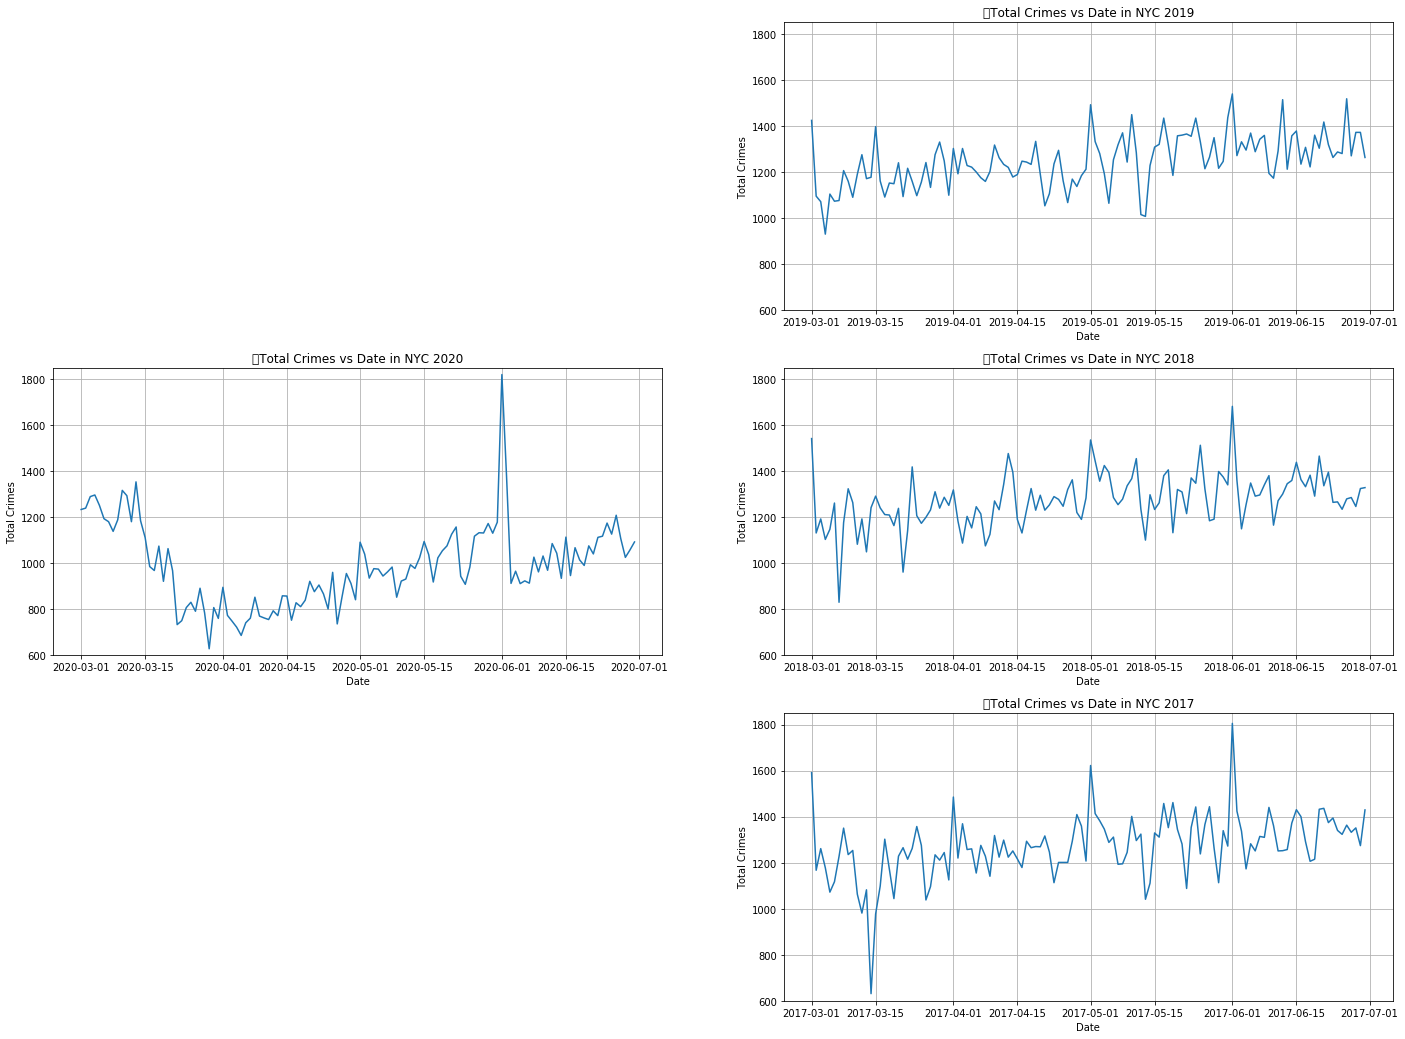

In [269]:
fig = plt.figure(figsize=(24, 18))

ax1 = plt.subplot(3, 2, 3)
ax1.plot(complaint2020Count_date["date"], complaint2020Count_date["total"])
ax1.set(xlabel='Date', ylabel='Total Crimes',
       title='Total Crimes vs Date in NYC 2020')
plt.ylim(600, 1850)
ax1.grid()

ax2 = plt.subplot(3, 2, 2)
ax2.plot(complaint2019Count_date["date"], complaint2019Count_date["total"])
ax2.set(xlabel='Date', ylabel='Total Crimes',
       title='Total Crimes vs Date in NYC 2019')
plt.ylim(600, 1850)
ax2.grid()

ax3 = plt.subplot(3, 2, 4)
ax3.plot(complaint2018Count_date["date"], complaint2018Count_date["total"])
ax3.set(xlabel='Date', ylabel='Total Crimes',
       title='Total Crimes vs Date in NYC 2018')
plt.ylim(600, 1850)
ax3.grid()

ax4 = plt.subplot(3, 2, 6)
ax4.plot(complaint2017Count_date["date"], complaint2017Count_date["total"])
ax4.set(xlabel='Date', ylabel='Total Crimes',
       title='Total Crimes vs Date in NYC 2017')
plt.ylim(600, 1850)
ax4.grid()

plt.show()

In [ ]:
# for 2017 data: https://weather.com/storms/winter/news/new-york-snow-winter-storm-stella 03/14/2017